# Model Evaluation Exercise

## Regression evaluation

In [1]:
# import numpy
import numpy as np

In [2]:
from sklearn.datasets import make_regression

X,y = make_regression(n_features=10, n_samples=1000, noise=10)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [3]:
from sklearn.linear_model import LinearRegression, Ridge

In [4]:
# creating linear regression
lr = LinearRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [5]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

_________________________
## Mean Absolute Error (MAE)


**Write the definition to the mean absolute error (MAE) below and how to interpret it?**
> *The MAE refers too....* ` The mean absolute error is the difference between the actual value and the predicted value.
> The MAE is a robust to outliers and doesnt penalise errors as extremely as MSE`. Its gives the magnitude of the error but not the direction of the error.

* import **mean_absolute_error** from sklearn

In [6]:
# import mean_absolute_error from sklearn
from sklearn.metrics import mean_absolute_error

* compute MAE

In [7]:
# compute MAE for linear regression
lr_mae = mean_absolute_error(y, y_lr)
print ("Linear Regression MAE: ", lr_mae)

Linear Regression MAE:  7.939687309386571


* According to MAE, what is the better model?
* `A value of 0 means no error`

____________________________________
## R2 - Coefficient of Determination

**Write the definition to the R2 score below and how to interpret it?**
> *The R2 refers too....* `The goodness of fit of a set of predictions to the actual values. The value ranges between 0 and 1 for no fit (0) and perfect fit (1).`

* import **r2_score** from sklearn

In [8]:
# import r2_score from sklearn
from sklearn.metrics import r2_score

* compute R2

In [9]:
# compute R2 for linear regression
lr_r2 = r2_score(y, y_lr)
print ("Linear Regression R2: ", lr_r2)

Linear Regression R2:  0.997839965226751


* According to R2, what is the better model?
* ` according to R2, this is the best model.`

* (Stretch) use predictions from linear regression and compute adjusted R2

In [10]:
# compute adjusted R2 for linear regression
lr_adj_r2 = 1 - (1-lr_r2)*(len(y)-1)/(len(y)-X.shape[1]-1)
print ("Linear Regression Adjusted R2: ", lr_adj_r2)

Linear Regression Adjusted R2:  0.9978181246324815


________________________________
## Classification evaluation

In [11]:
from sklearn.datasets import make_classification

X,y = make_classification(n_features=10, n_samples=1000, n_classes=2)

print(X.shape)
print(y.shape)

(1000, 10)
(1000,)


In [12]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [13]:
# creating linear regression
lr = LogisticRegression()
lr.fit(X,y)
y_lr = lr.predict(X)

In [14]:
# creating ridge regression
rr = RidgeClassifier(alpha=0.1)
rr.fit(X,y)
y_rr = rr.predict(X)

## Precision score

**Write the definition to the Precision score below and how to interpret it?**
> *The Precision score refers too....* ` Also called Classification accuracy. Is the number of correct predictions divided by the total number of predictions. Its is the most common way of measuring how accurate the classifier is, but also the most misused. It is only useful when there is an equal number of observations in each class which is rarely the case.`

* import **precision_score** from sklearn

In [15]:
# import accuracy_score from sklearn
from sklearn.metrics import accuracy_score

* compute precision

In [16]:
# compute accuracy
# compute accuracy for linear regression
lr_accuracy = accuracy_score(y, y_lr)
# print accuracy
print ("Linear Regression Accuracy: ", lr_accuracy)

Linear Regression Accuracy:  0.938


* print precision

* import **recal_score** from sklearn

The recall is the ratio `tp / (tp + fn)` where `tp is the number of true positives` and `fn the number of false negatives.` The recall is intuitively the ability of the classifier to find all the positive samples.

`The best value is 1 and the worst value is 0.`

In [17]:
#import recall_score from sklearn
from sklearn.metrics import recall_score

* compute recall

In [18]:
# compute recall
# compute recall for linear regression
lr_recall = recall_score(y, y_lr)
# print recall
print ("Linear Regression Recall: ", lr_recall)

Linear Regression Recall:  0.9538152610441767


* print recall

## ROC curve

**What is the ROC curve? How do you interpret it?**
> *The ROC curve refers too....*
> `Is the performance metric for binary classification. It reports the models ability to distinguish between positive and negative classes. An area of 1 represents a model that made all the predictions perfectly. An area of 0 represents a model that did not make any predictions perfectly, and 0.5 represnts a model thats as good as random.`

* import **roc_curve** from sklearn

In [19]:
# import roc_curve from sklearn
from sklearn.metrics import roc_curve

* compute and store ROC curve values in fpr, tpr, thresholds variables

In [20]:
# compute roc curve values for linear regression in fpr, tpr, thresholds
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y, y_lr)

* import matplotlib 

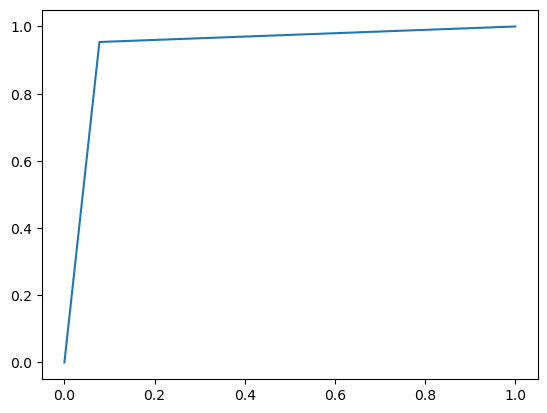

In [21]:
import matplotlib.pyplot as plt
# plot roc curve
plt.plot(lr_fpr, lr_tpr, label='Linear Regression')

In [22]:
# compute roc_auc_score from sklearn
from sklearn.metrics import roc_auc_score

# compute auc score for linear regression
lr_auc = roc_auc_score(y, y_lr)
# print auc score
print ("Linear Regression AUC: ", lr_auc)

#compute auc score for ridge regression
rr_auc = roc_auc_score(y, y_rr)
# print auc score
print ("Ridge Regression AUC: ", rr_auc)

Linear Regression AUC:  0.9380630090081441
Ridge Regression AUC:  0.926214819437111


* plot ROC

## Log-Loss score
**What is the Log-Loss score? How do you interpret it?**
> *The Log-Loss score refers too...*
> `Log Loss is is a meatric for evaluating the predictions of probabilities of membership to a given calss. The scalar probability of between 0 and 1 can be seen as a measure of confidence for a prediction by an algorithm.`

* import **log_loss** from sklearn

In [23]:
# import log_loss from sklearn
from sklearn.metrics import log_loss

* compute log_loss

In [24]:
# compute log loss for linear regression
lr_log_loss = log_loss(y, y_lr)
# print log loss
print ("Linear Regression Log Loss: ", lr_log_loss)

# compute log loss for ridge regression
rr_log_loss = log_loss(y, y_rr)
# print log loss
print ("Ridge Regression Log Loss: ", rr_log_loss)


Linear Regression Log Loss:  2.1414353207842405
Ridge Regression Log Loss:  2.555920627458924


* print log_loss

#### Q: According to metrics above, which one is the better model?
` Linear Regression`

#### Other metrics

In [25]:
# Classification Report
from sklearn.metrics import classification_report

# print classification report for linear regression
print ("Linear Regression Classification Report: \n", classification_report(y, y_lr))

# print classification report for ridge regression
print ("Ridge Regression Classification Report: \n", classification_report(y, y_rr))

Linear Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       502
           1       0.92      0.95      0.94       498

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

Ridge Regression Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92       502
           1       0.88      0.98      0.93       498

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000

